In [18]:
import os
import pathlib
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_anat

In [7]:
working_dir = pathlib.Path(os.getcwd())
print(f'Working directory: {working_dir}')

Working directory: /Users/sebastientourbier/Softwares/forks/mialsuperresolutiontoolkit-1/notebooks


  > Load SR image /Users/sebastientourbier/Softwares/forks/mialsuperresolutiontoolkit-1/notebooks/data/sub-01_rec-SR_id-1_T2w.nii.gz...
    Image properties: Zooms=(1.125, 1.125, 1.125)/ Shape=(320, 320, 73)/ FOV=[360.    360.     82.125]/ middle cut=[160, 160, 36]
  > Crop SR image at (100:220, 100:220, 0:-1)...
Save the PNG as /Users/sebastientourbier/Softwares/forks/mialsuperresolutiontoolkit-1/notebooks/sub-01_rec-SR_id-1_T2w.png


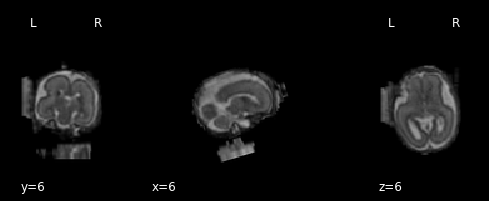

In [24]:
out_sr = pathlib.Path(working_dir / 'data' / 'sub-01_rec-SR_id-1_T2w.nii.gz')
out_sr_png = pathlib.Path(working_dir / 'sub-01_rec-SR_id-1_T2w.png')

##################################
# Load the super-resolution image
##################################
print(f'  > Load SR image {out_sr}...')
img = nib.load(out_sr)

# Get image properties
zooms = img.header.get_zooms()  # zooms are the size of the voxels
shape = img.shape
fov = np.array(zooms) * np.array(shape)
# Get middle cut
cut = [s // 2 for s in shape]

print(f'    Image properties: Zooms={zooms}/ Shape={shape}/ FOV={fov}/ middle cut={cut}')

####################################################
# Crop the image if the FOV exceeds a certain value
####################################################
def compute_axis_crop_indices(cut, fov, max_fov=120):
    '''Compute the cropping index in a dimension if the Field-Of-View exceeds a maximum value of 120mm by default.
    
    Parameters
    ----------
    cut: int
        Middle slice index in a given dimension
        
    fov: float
        Slice Field-of-View (mm) in a given dimension
        
    max_fov: float
        Maximum Slice Field-of-View (mm) to which the image does not need to be cropped
        (120mm by default)
        
    Returns
    -------
    (crop_start_index, crop_end_index): (int, int)
        Starting and ending indices of the image crop along the given dimension

    '''
    crop_start_index = cut - max_fov // 2 if fov > max_fov else 0
    crop_end_index = cut + max_fov // 2 if fov > max_fov else -1
    return (crop_start_index, crop_end_index)
   
max_fov = 120 # in mm
crop_start_x, crop_end_x = compute_axis_crop_indices(cut[0], fov[0], max_fov=max_fov)
crop_start_y, crop_end_y = compute_axis_crop_indices(cut[1], fov[1], max_fov=max_fov)
crop_start_z, crop_end_z = compute_axis_crop_indices(cut[2], fov[2], max_fov=max_fov)

print(
    f'  > Crop SR image at '
    f'({crop_start_x}:{crop_end_x}, {crop_start_y}:{crop_end_y}, {crop_start_z}:{crop_end_z})...'
)
cropped_img = img.slicer[
    crop_start_x:crop_end_x,
    crop_start_y:crop_end_y,
    crop_start_z:crop_end_z
]

###########################
# Create and save the plot
###########################
display = plot_anat(
    cut_coords= (6, 6, 6),
    anat_img=cropped_img,
    annotate=True,
    draw_cross=False,
    black_bg=True,
    dim='auto',
    display_mode='ortho',
)
print(f'Save the PNG as {out_sr_png}')
plt.savefig(
    out_sr_png,
    dpi=100,
    facecolor='k',
    edgecolor='k'
)